In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/NNFL-Assignment1/data_q11.csv', header= None)
df.head()

num_classes = 20

In [19]:
data = df.values

def update(l,data):
  u=[]
  groups=[]
  for i in range(20):
    groups.append(np.ndarray((0,data.shape[1])))
  for index in range(len(data)):
    groups[int (l[index][0]) - 1]=np.concatenate((groups[int (l[index][0]) - 1],data[index].reshape(1,df.shape[1])),axis=0)
  for i in range(20):
    u_temp=np.zeros((1,data.shape[1]))
    group=groups[i-1]
    if len(group)==0:
      u.append(u_temp)
      continue
    for j in range(data.shape[1]):
      u_temp[0][j]=np.mean(group[:,j:j+1])
    u.append(u_temp)
  l_new=np.ones((len(data),1))
  for index in range(len(data)):
    distances=np.zeros(20)
    for i in range(20):
      distances[i]=euclid_distance(data[index],u[i])
    l_new[index][0]=np.argmin(distances)
  
  return l_new

In [20]:
def check(l,l_new):
  for k in range(len(l)):
    if l[k][0]!=l_new[k][0]:
      return False
  return True

In [24]:
def euclid_distance(x,y):
  distance=0
  for j in range(len(x)):
    distance=distance+(x[j]-y[0][j])*(x[j]-y[0][j])
  return math.sqrt(distance)

In [25]:
r=np.ones((len(df),1))
for k in range(len(df)):
  r[k][0]=np.random.randint(1,num_classes+1) #20 classes

In [26]:
r_new=update(r,data)
t=0
while(not check(r,r_new)):
  t = t + 1
  r = r_new
  r_new = update(r,data)

In [28]:
groups=[]
for i in range(20):
  groups.append(np.ndarray((0,data.shape[1])))
for index in range(len(data)): 
  groups[int (r_new[index][0]) - 1]=np.concatenate((groups[int (r_new[index][0]) - 1],data[index].reshape(1,df.shape[1])),axis=0)

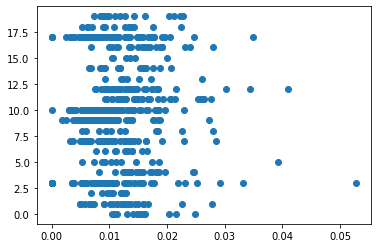

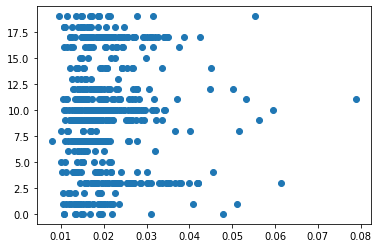

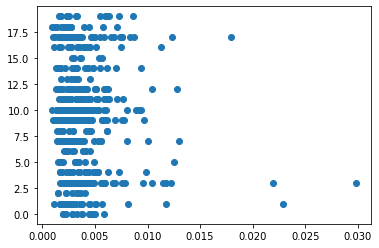

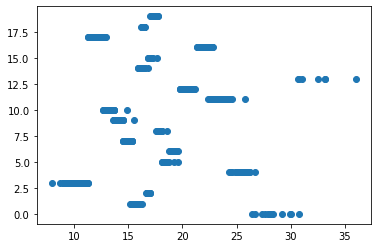

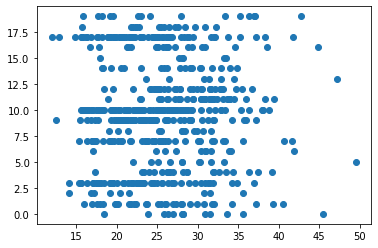

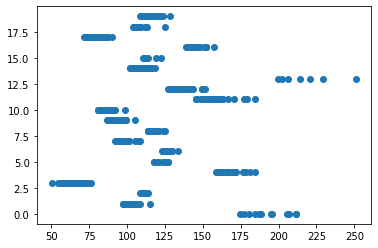

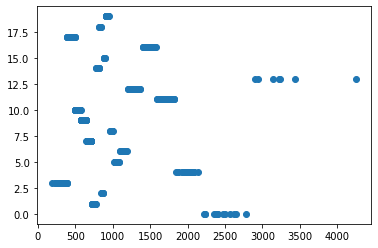

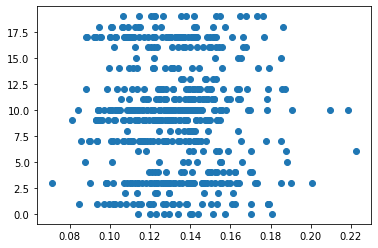

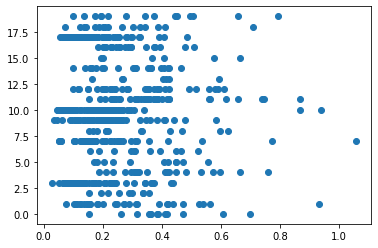

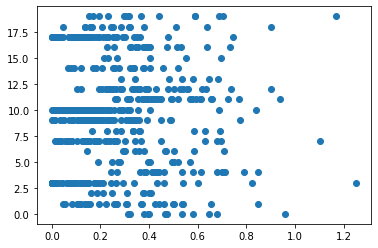

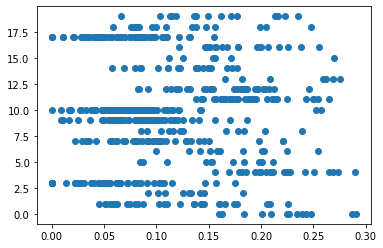

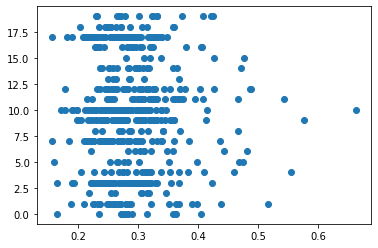

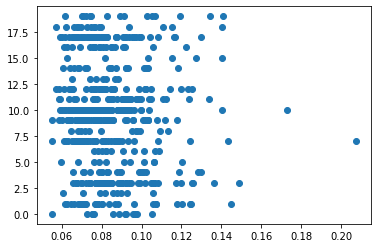

In [30]:
for i in range(data.shape[1]):
  plt.scatter(data[:,i:i+1],r_new)
  plt.show()